In [1]:
# This script begins by analyzing a CSV file containing the results of a step analysis function(test_analysis.py), where each entry is labeled as either 'simple' (represented by 0) or 'complex' (represented by 1).
# The objective of the script is to process this data further and use it to build a classification model using the Random Forest algorithm.
# Feature Importance extraction from the claasification rf model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import ttest_ind

In [3]:
# Load your data
# Paths to the Simple and Complex CSV files
simple_csv = r"S:\03_HiWiS\Harshith\ILSC-APP\3D_STEP_file_analysis\data\Selected_Manually\Combined\Simple\Simple_selected\Simple_selected_analysis_result_V06.csv"
complex_csv = r"S:\03_HiWiS\Harshith\ILSC-APP\3D_STEP_file_analysis\data\Selected_Manually\Combined\Complex\Complex_selected\Complex_selected_analysis_result_V06.csv"

# Load the first CSV file
df_simple = pd.read_csv(simple_csv)
# Add the 'Class' column with value 0 for the first file
df_simple['Class'] = 0

# Load the second CSV file
df_complex = pd.read_csv(complex_csv)
# Add the 'Class' column with value 1 for the second file
df_complex['Class'] = 1

# Concatenate both DataFrames into one
df = pd.concat([df_simple, df_complex], ignore_index=True)


In [4]:
# # Load your data
# csv_dir = r"S:\03_HiWiS\Harshith\ILSC-APP\3D_STEP_file_analysis\results\selected_analysis.csv"
# df = pd.read_csv(csv_dir)
# #simple 0, complex-1

In [5]:
# 1. Data Exploration
print(df.info())
print(df.describe())
print(df['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   File Name            262 non-null    object 
 1   Total Faces          262 non-null    int64  
 2   Curved Faces         262 non-null    int64  
 3   Total Edges          262 non-null    int64  
 4   Vertices             262 non-null    int64  
 5   Bounding Box Volume  262 non-null    float64
 6   Mean Curvature       262 non-null    float64
 7   Curvature Std Dev    262 non-null    float64
 8   Volume               262 non-null    float64
 9   Hole Count           262 non-null    int64  
 10  size                 262 non-null    float64
 11  ispart               262 non-null    int64  
 12  Criteria Met         262 non-null    int64  
 13  Class                262 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 28.8+ KB
None
       Total Faces  Curved 

C:\Users\Student\AppData\Local\Temp/ipykernel_4388/1697679940.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


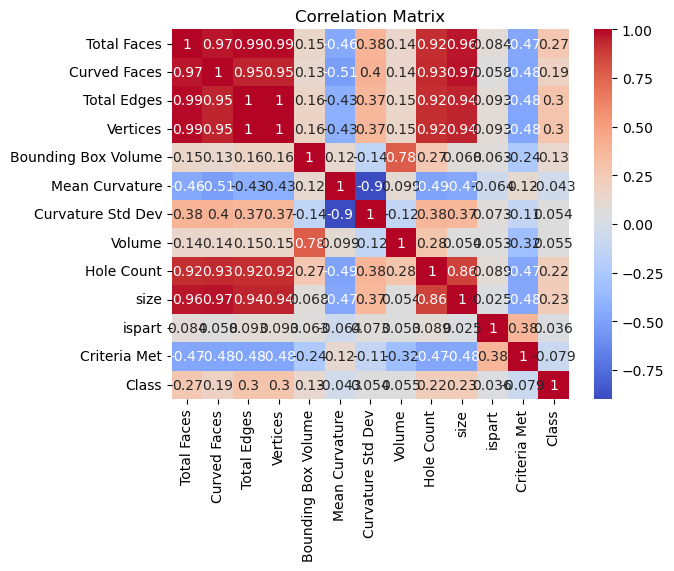

In [6]:
# Check correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# 2. Statistical Analysis
for column in df.columns[1:-2]:  # Exclude File Name, Criteria Met, and Class
    group_0 = df[df['Class'] == 0][column]
    group_1 = df[df['Class'] == 1][column]
    t_stat, p_val = ttest_ind(group_0, group_1)
    print(f"{column}: t-stat={t_stat:.4f}, p-value={p_val:.4f}")

Total Faces: t-stat=-4.5276, p-value=0.0000
Curved Faces: t-stat=-3.0872, p-value=0.0022
Total Edges: t-stat=-4.9800, p-value=0.0000
Vertices: t-stat=-4.9800, p-value=0.0000
Bounding Box Volume: t-stat=-2.0506, p-value=0.0413
Mean Curvature: t-stat=0.6962, p-value=0.4869
Curvature Std Dev: t-stat=-0.8781, p-value=0.3807
Volume: t-stat=-0.8855, p-value=0.3767
Hole Count: t-stat=-3.5845, p-value=0.0004
size: t-stat=-3.8576, p-value=0.0001
ispart: t-stat=-0.5740, p-value=0.5665


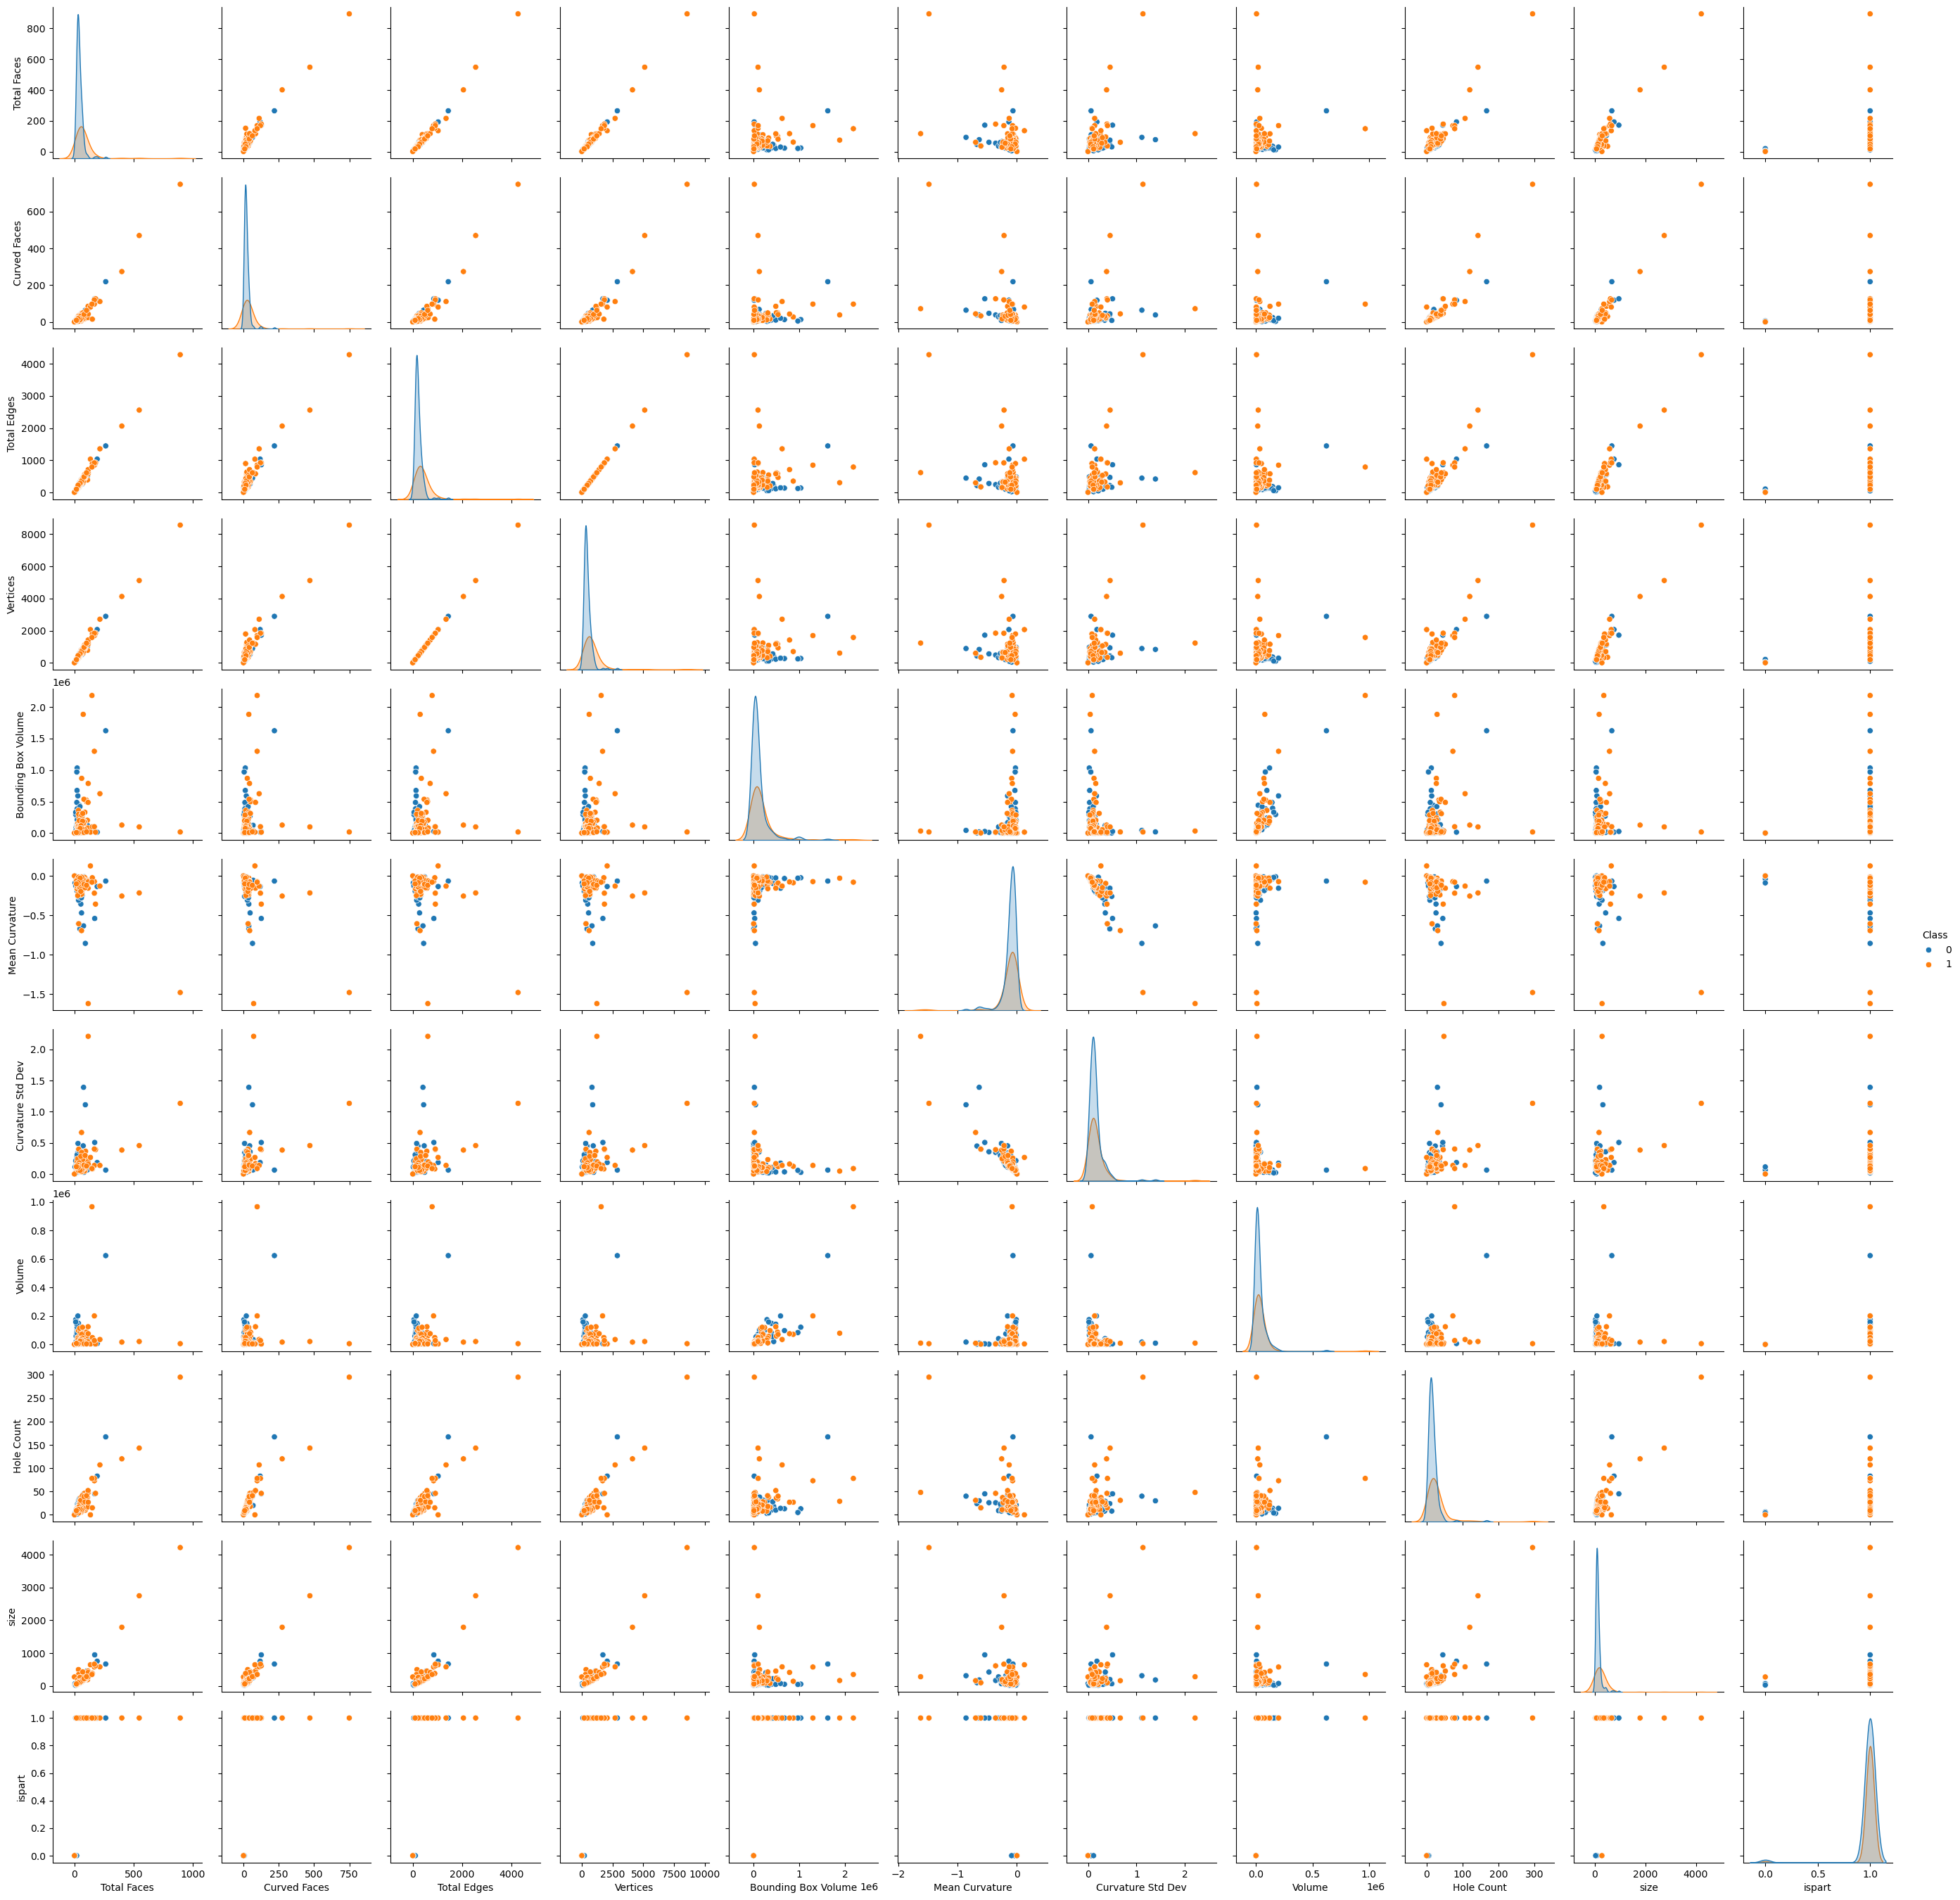

In [8]:
# 3. Pairwise Scatter Plots
sns.pairplot(df, hue='Class', vars=['Total Faces', 'Curved Faces', 'Total Edges',
                                    'Vertices', 'Bounding Box Volume', 'Mean Curvature',
                                    'Curvature Std Dev', 'Volume', 'Hole Count', 'size', 'ispart'])
plt.show()

In [9]:
# 4. Classification with Random Forest
X = df[['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices',
        'Bounding Box Volume',
        'Volume', 'Hole Count', 'size']]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6835443037974683
[[42  7]
 [18 12]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.63      0.40      0.49        30

    accuracy                           0.68        79
   macro avg       0.67      0.63      0.63        79
weighted avg       0.67      0.68      0.66        79



In [11]:
# Feature Importance from rf model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
               Feature  Importance
7                 size    0.217887
2          Total Edges    0.150937
3             Vertices    0.128986
0          Total Faces    0.126652
4  Bounding Box Volume    0.103127
5               Volume    0.098123
6           Hole Count    0.092220
1         Curved Faces    0.082068


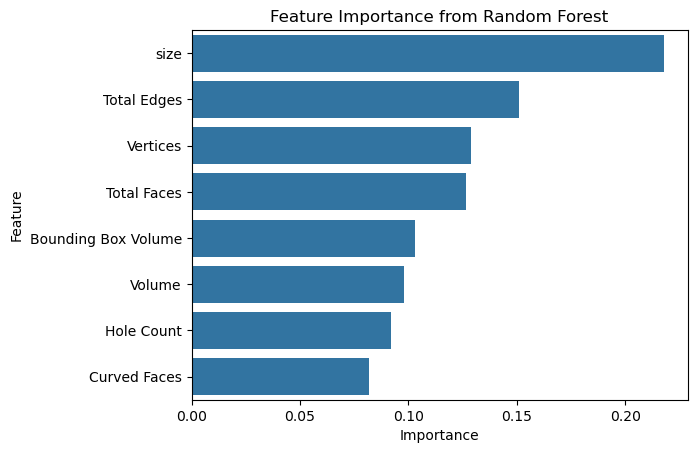

In [12]:
# Plot Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance from Random Forest")
plt.show()

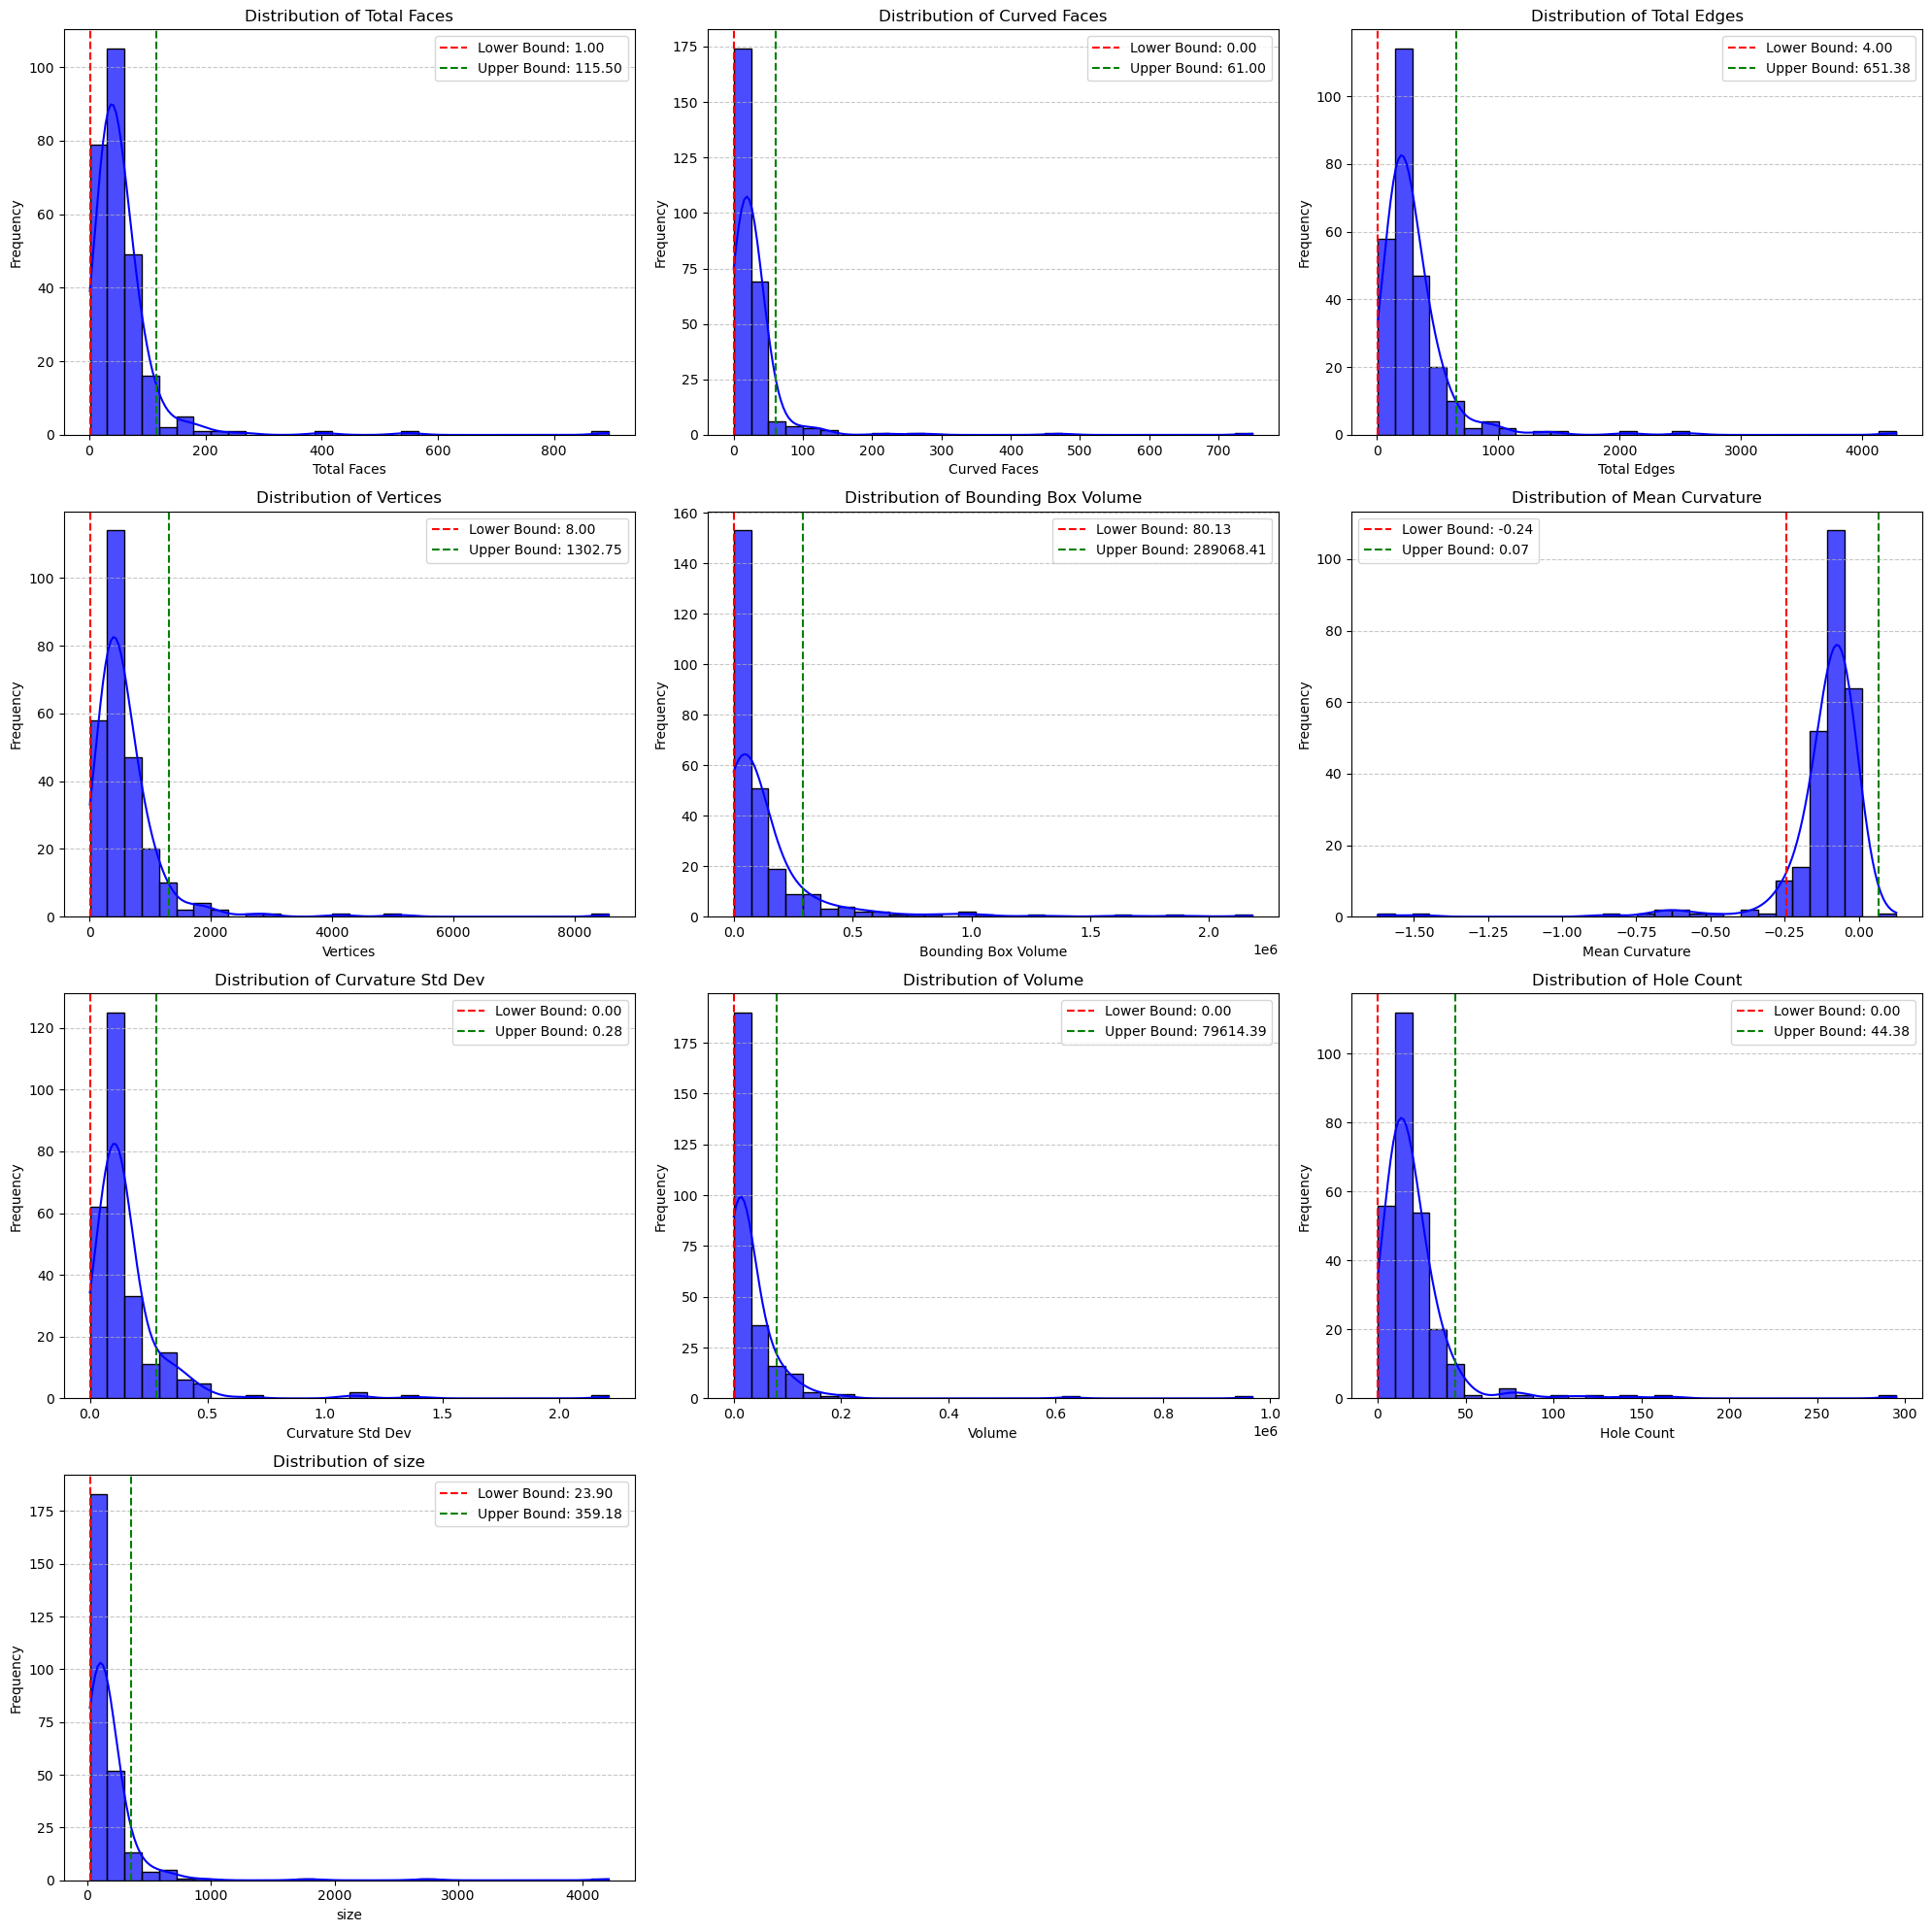

Feature Ranges:
Total Faces: {'Lower Bound': 1, 'Upper Bound': 115.5, 'IQR': 35.0}
Curved Faces: {'Lower Bound': 0, 'Upper Bound': 61.0, 'IQR': 20.0}
Total Edges: {'Lower Bound': 4, 'Upper Bound': 651.375, 'IQR': 199.75}
Vertices: {'Lower Bound': 8, 'Upper Bound': 1302.75, 'IQR': 399.5}
Bounding Box Volume: {'Lower Bound': 80.12550670386956, 'Upper Bound': 289068.41250368336, 'IQR': 108957.95178240362}
Mean Curvature: {'Lower Bound': -0.24414678181321292, 'Upper Bound': 0.06766490831240059, 'IQR': 0.07795292253140337}
Curvature Std Dev: {'Lower Bound': 0.0, 'Upper Bound': 0.2830688253530466, 'IQR': 0.08162063323595609}
Volume: {'Lower Bound': 7.972801498324582e-13, 'Upper Bound': 79614.38780867905, 'IQR': 29849.112818246795}
Hole Count: {'Lower Bound': 0, 'Upper Bound': 44.375, 'IQR': 13.75}
size: {'Lower Bound': 23.90234375, 'Upper Bound': 359.1802978515625, 'IQR': 114.980712890625}


In [13]:
# Define the features to analyze
features = ['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices',
            'Bounding Box Volume', 'Mean Curvature', 'Curvature Std Dev',
            'Volume', 'Hole Count', 'size']

# Create a directory to store the results
feature_ranges = {}

# Set up the subplots
total_features = len(features)
fig, axes = plt.subplots(nrows=(total_features + 2) // 3, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]

    # Plot distribution
    sns.histplot(df[feature], kde=True, bins=30, color="blue", alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Calculate the range where most files lie (e.g., the interquartile range)
    q1 = np.percentile(df[feature], 25)  # 25th percentile
    q3 = np.percentile(df[feature], 75)  # 75th percentile
    iqr = q3 - q1  # Interquartile range

    lower_bound = max(df[feature].min(), q1 - 1.5 * iqr)  # Whisker lower bound
    upper_bound = min(df[feature].max(), q3 + 1.5 * iqr)  # Whisker upper bound

    # Highlight the range on the plot
    ax.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
    ax.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
    ax.legend()

    # Save the range for this feature
    feature_ranges[feature] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "IQR": iqr
    }

# Remove any unused subplots
for idx in range(len(features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Display ranges for all features
print("Feature Ranges:")
for feature, ranges in feature_ranges.items():
    print(f"{feature}: {ranges}")


In [14]:
# Define the criteria
criteria = (
    (20 <= df["Total Faces"]) & (df["Total Faces"] <= 120) &
    (5 <= df["Curved Faces"]) & (df["Curved Faces"] <= 50) &
    (100 <= df["Total Edges"]) & (df["Total Edges"] <= 700) &
    (200 <= df["Vertices"]) & (df["Vertices"] <= 1500) &
    (1e3 <= df["Volume"]) & (df["Volume"] <= 1.5e5) &
    (5 <= df["Hole Count"]) & (df["Hole Count"] <= 50) &
    (25 <= df["size"]) & (df["size"] <= 500) &
    (df["ispart"] == 1)
)

# Filter rows that satisfy the criteria
filtered_df = df[criteria]
# Print the file names of the matching rows
print("Files satisfying the criteria:")
filtered_df.describe()


Files satisfying the criteria:


,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,size,ispart,Criteria Met,Class
count,223.000000,223.000000,223.000000,223.00000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.0,223.0,223.000000
mean,46.609865,21.067265,254.775785,509.55157,1.162911e+05,-0.105752,0.143986,25793.146537,17.188341,130.312277,1.0,8.0,0.372197
std,21.540561,11.246219,122.791275,245.58255,2.012397e+05,0.104443,0.126283,30502.748562,8.841979,78.452226,0.0,0.0,0.484478
min,20.000000,5.000000,102.000000,204.00000,2.611995e+03,-0.695411,0.025965,1081.403243,5.000000,44.357422,1.0,8.0,0.000000
25%,29.000000,12.000000,160.000000,320.00000,1.842653e+04,-0.120009,0.081526,5179.226487,11.000000,72.945801,1.0,8.0,0.000000
50%,40.000000,18.000000,218.000000,436.00000,4.916225e+04,-0.076892,0.112197,13596.986612,15.000000,106.486328,1.0,8.0,0.000000
75%,61.500000,28.500000,329.000000,658.00000,1.209365e+05,-0.049415,0.154805,33262.771853,22.000000,167.064941,1.0,8.0,1.000000
max,115.000000,50.000000,634.000000,1268.00000,1.883166e+06,-0.011202,1.390397,147810.064925,46.000000,458.039062,1.0,8.0,1.000000


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
model_XG = XGBClassifier(random_state=42)

# Train the model
model_XG.fit(X_train, y_train)

# Make predictions
y_XG_pred = model_XG.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_XG_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6455696202531646


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5443037974683544


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6329113924050633


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred = mlp_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.569620253164557


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6329113924050633


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6582278481012658
